# Segundo notebook de graficación
- Óscar A. Alvarado Morán
- Oscar A. Esquivel-Flores

---

Lo que sabemos de graficación ya podemos llevarlo a la estadística ...
## StastPlots

Para esto no hay imagen :c

`StatsPlots.jl` es una biblioteca de _recipes_ (o recetas), tiene entonces muchas recetas de cómo interpretar comandos de graficación, por ejemplo, nos dirá cómo usar las `Distribuciones`.

In [1]:
#using Pkg; Pkg.add("Distributions")
using Distributions
plot(Normal(0,1), lw = 3)

LoadError: UndefVarError: plot not defined

#### Justo vemos que necesitamos usar StatPlots porque no se le puede pasar lo que querramos!

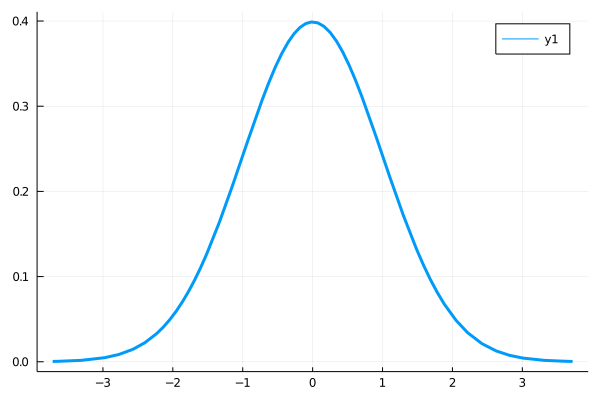

In [2]:
#import Pkg; Pkg.add("StatsPlots")
using StatsPlots
μ = 0
σ = 1
plot(Normal(μ, σ), lw = 3)

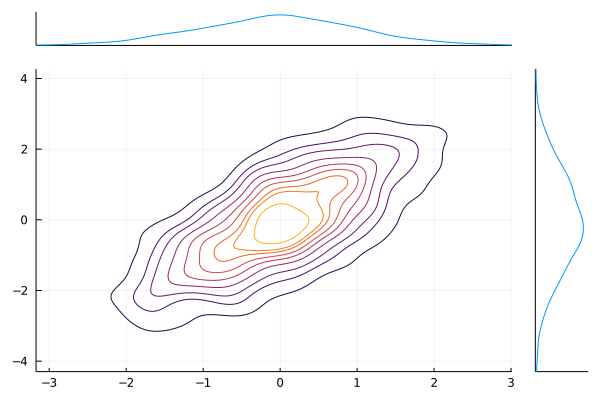

In [3]:
x = randn(1024)
y = randn(1024)
marginalkde(x, x+y)

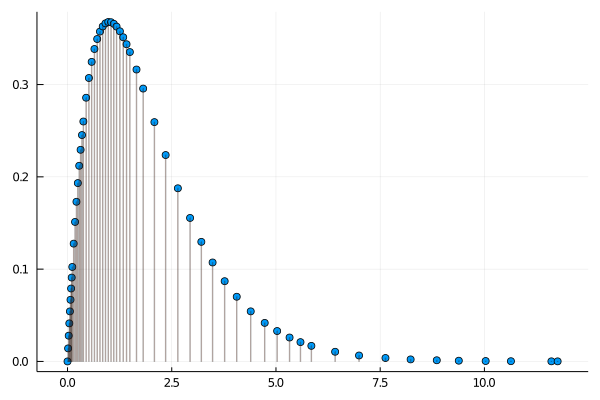

In [4]:
dist = Gamma(2)
scatter(dist, leg=false)
bar!(dist, alpha=0.3)

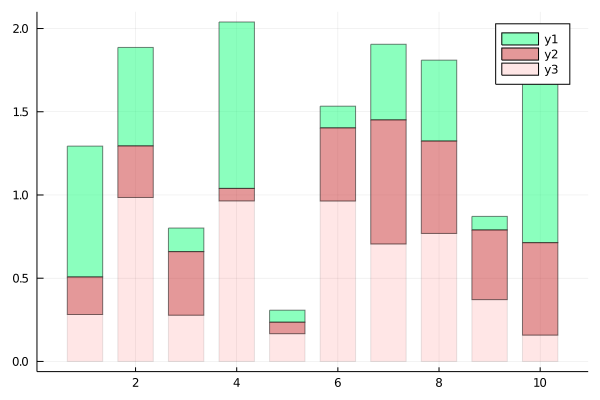

In [8]:
groupedbar(rand(10,3), bar_position = :stack, bar_width=0.7, c = [RGB(0.1,1,0.5) "#CB3234" :red], alpha = [0.5 0.5 0.1])

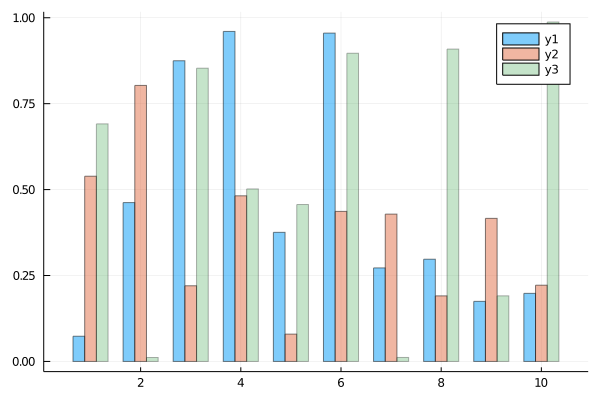

In [9]:
groupedbar(rand(10,3), bar_width=0.7, alpha = [0.5 0.5 0.3]) # bar_position = :dodge

---

Ahora sí pasamos a lo chido ...

## Plotly

<p align="center">
    <a href="http://juliaplots.org/PlotlyJS.jl/stable/" />
    <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/3/37/Plotly-logo-01-square.png/1200px-Plotly-logo-01-square.png" width=500 height=500/>
</p>

In [1]:
using Plots
plotly(size = (900, 500))

┌ Info: For saving to png with the Plotly backend PlotlyBase has to be installed.
└ @ Plots /home/oscar/.julia/packages/Plots/lmp2A/src/backends.jl:372


Plots.PlotlyBackend()

In [2]:
# Gráfica sencilla
x = [1, 2, 3]
y = [3, 4, 8]
plot(x, y, title="Gráfica básica Plotly", marker = 5, lw = 3)

<!DOCTYPE html>
 
 
 Plots.jl

In [3]:
trace1 = plot([1, 2, 3, 4], [10, 15, 13, 17], marker = 3)
trace2 = plot!([1, 2, 3, 4], [16, 5, 11, 9], marker = 5)

<!DOCTYPE html>
 
 
 Plots.jl

In [79]:
x = [1, 2, 3, 4, 5]
y = [1, 6, 3, 6, 1]
t1 = scatter(x, y, 
    series_annotation=[Plots.text("A-1",:left, :top), Plots.text("A-2",:left, :top), 
        Plots.text("A-3", :right, :bottom), Plots.text("A-4", 10,:left, :top), 
        Plots.text("A-5", 5,:left, :top)], marker = [5,10,20,30,40], 
    c = [:blue,:green,:yellow,:orange,:red], alpha = [0.5,0.5,0.5,0.5,0.5])

<!DOCTYPE html>
 
 
 Plots.jl

In [150]:
#using Pkg; Pkg.add("CSV")
using CSV
using DataFrames

# reference: https://plot.ly/r/dumbbell-plots/
# read Data into dataframe
nm = tempname()
url = "https://raw.githubusercontent.com/plotly/datasets/master/school_earnings.csv"
download(url, nm)
df = CSV.read(nm, DataFrame)
rm(nm)

# sort dataframe by male earnings
df = sort(df, :Men, rev=false)

men = scatter(df[:Men], df[:School], name="Men", color=:blue, marker_size=12, size = (800,800))
yticks!(0.5:1:20.5, df[:School])
women = scatter!(df[:Women], df[:School], name="Women",color=:pink, marker_size=12)

<!DOCTYPE html>
 
 
 Plots.jl

In [202]:
plot(1:4, [0, 2, 3, 5], marker=5, fillrange = 0, fillalpha = 0.5, alpha = 0.5)#fill="tozeroy")
plot!(1:4, [3, 5, 1, 7], marker=5, fillrange = [0, 2, 3, 5], fillalpha = 0.5, color = :green)#fill="tonexty")

<!DOCTYPE html>
 
 
 Plots.jl

In [160]:
plotattr("fillrange")

fillrange {Number or AbstractVector}
fill_between, fillbetween, fillranges, fillrng, fillto, frange

Fills area between fillrange and y for line-types, sets the base for bar/stick types, and similar for other types.
Series attribute,  default: nothing


In [211]:
n = 400
rw() = cumsum(randn(n))
plot(rw(),rw(),rw(), lw = 3, color="#1f77b4")
plot!(rw(),rw(),rw(), lw = 3, color="#9467bd")
plot!(rw(),rw(),rw(), lw = 3, color="#bcbd22")

<!DOCTYPE html>
 
 
 Plots.jl

In [231]:
p1 = plot([1, 2, 3],[4, 5, 6],marker=10, label="y1")
p2 = plot([20, 30, 40],[50, 60, 70], c = :red, marker = 5, label="y2")
plot(p1,p2, layout = 2)

<!DOCTYPE html>
 
 
 Plots.jl

In [235]:
x = 1:0.5:20
y = 1:0.5:10
f(x, y) = (3x + y ^ 2) * abs(sin(x) + cos(y))
X = repeat(reshape(x, 1, :), length(y), 1)
Y = repeat(y, 1, length(x))
Z = map(f, X, Y)
p1 = contour(x, y, f, fill = true)
p2 = contour(x, y, Z)
plot(p1, p2)

<!DOCTYPE html>
 
 
 Plots.jl

In [236]:
group = rand(map((i->begin
                    "group $(i)"
                end), 1:4), 100)
plot(rand(100), layout = @layout([a b; c]), group = group, linetype = [:bar :scatter :steppre], linecolor = :match)

<!DOCTYPE html>
 
 
 Plots.jl

In [237]:
Θ = range(0, stop = 1.5π, length = 100)
r = abs.(0.1 * randn(100) + sin.(3Θ))
plot(Θ, r, proj = :polar, m = 2)

<!DOCTYPE html>
 
 
 Plots.jl

In [238]:
xs = [string("x", i) for i = 1:10]
ys = [string("y", i) for i = 1:4]
z = float((1:4) * reshape(1:10, 1, :))
heatmap(xs, ys, z, aspect_ratio = 1)

<!DOCTYPE html>
 
 
 Plots.jl

In [239]:
x = rand(10)
p1 = plot(x, title = "Default looks")
p2 = plot(x, grid = (:y, :olivedrab, :dot, 1, 0.9), title = "Modified y grid")
p3 = plot(deepcopy(p2), title = "Add x grid")
xgrid!(p3, :on, :cadetblue, 2, :dashdot, 0.4)
plot(p1, p2, p3, layout = (1, 3), label = "", fillrange = 0, fillalpha = 0.3)

<!DOCTYPE html>
 
 
 Plots.jl

In [241]:
scatter(fill(randn(10), 6), fill(randn(10), 6), framestyle = [:box :semi :origin :zerolines :grid :none], title = [":box" ":semi" ":origin" ":zerolines" ":grid" ":none"], color = permutedims(1:6), layout = 6, markerstrokewidth = 0, ticks = -2:2)

<!DOCTYPE html>
 
 
 Plots.jl

┌ Warning: Framestyle :semi is not supported by Plotly and PlotlyJS. :box was cosen instead.
└ @ Plots /home/oscar/.julia/packages/Plots/lmp2A/src/backends/plotly.jl:10
┌ Warning: Framestyle :origin is not supported by Plotly and PlotlyJS. :zerolines was cosen instead.
└ @ Plots /home/oscar/.julia/packages/Plots/lmp2A/src/backends/plotly.jl:10


In [242]:
t = range(0, stop = 1, length = 100)
θ = (6π) .* t
x = t .* cos.(θ)
y = t .* sin.(θ)
p1 = plot(x, y, line_z = t, linewidth = 3, legend = false)
p2 = scatter(x, y, marker_z = (+), color = :bluesreds, legend = false)
plot(p1, p2)

<!DOCTYPE html>
 
 
 Plots.jl

In [244]:
plot([(0, 0), (0, 0.9), (1, 0.9), (2, 1), (3, 0.9), (80, 0)], legend = :outertopright)
plot!([(0, 0), (0, 0.9), (2, 0.9), (3, 1), (4, 0.9), (80, 0)])
plot!([(0, 0), (0, 0.9), (3, 0.9), (4, 1), (5, 0.9), (80, 0)])
plot!([(0, 0), (0, 0.9), (4, 0.9), (5, 1), (6, 0.9), (80, 0)])
lens!([1, 6], [0.9, 1.1], inset = (1, bbox(0.5, 0.0, 0.4, 0.4)))

<!DOCTYPE html>
 
 
 Plots.jl

In [252]:
x = [0, 1, 2, 0]
y = [0, 0, 1, 2]
z = [0, 2, 0, 1]
i = [0, 0, 0, 1]
j = [1, 2, 3, 2]
k = [2, 3, 1, 3]
mesh3d(x, y, z; connections = (i, j, k), c = :green, alpha = 0.7)

<!DOCTYPE html>
 
 
 Plots.jl

In [6]:
x=1:0.1:3*π
y=1:0.1:3*π

xx = reshape([xi for xi in x for yj in y],  length(y), length(x))
yy = reshape([yj for xi in x for yj in y],  length(y), length(x))
zz = sin.(xx).*cos.(yy)
plot3d(xx,yy,zz, label=:none, st = :surface)
plot!(xlab="x", ylab="y", zlab="sin(x)*cos(y)")
savefig("../../imgs/img2")

---